In [1]:
import numpy as np
#import MigPreFuncoes
from scipy.fft import fft,rfft, rfftfreq, irfft
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import importlib
#import SlantStack
from tqdm import tqdm
import Diffrapy as df

In [8]:
nz=100
nx=ntr=120
dx=1
dz=1
c=250

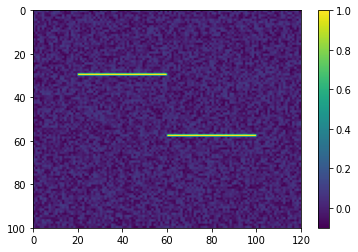

In [4]:
MOD1 = np.zeros([ntr,nz])

#Adicionando ruído no modelo
np.random.seed(13)
nn = np.random.rand(ntr,nz)
MOD1 = MOD1+(nn-0.5)*0.2

#Barra
x_ini_1 = int(np.round(1*ntr/6))
x_fim_1 = int(np.round(3*ntr/6))
x_ini_2 = int(np.round(3*ntr/6))
x_fim_2 = int(np.round(5*ntr/6))

for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nz*2/7))
    MOD1[i,z]=1
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(nz*4/7))
    MOD1[i,z]=1

R1 = MOD1.T

plt.imshow(MOD1.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
plt.colorbar()
plt.show()

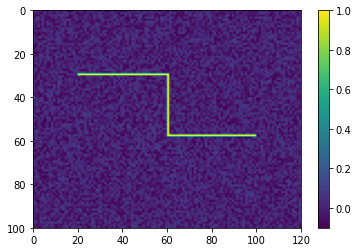

In [5]:
MOD2 = np.zeros([ntr,nz])

#Adicionando ruído no modelo
nn = np.random.rand(ntr,nz)
MOD2 = MOD2+(nn-0.5)*0.2

for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nz*2/7))
    MOD2[i,z]=1
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(nz*4/7))
    MOD2[i,z]=1

#Vertical
z_ini_1 = int(np.round(nz*2/7))
z_fim_1 = int(np.round(nz*4/7))

for i in range(z_ini_1,z_fim_1):
    x = int(np.round(3*ntr/6))
    MOD2[x,i]=1

R2 = MOD2.T

plt.imshow(MOD2.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
plt.colorbar()
plt.show()

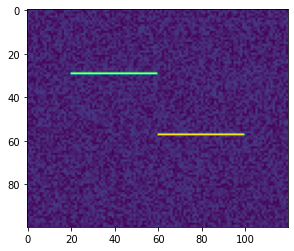

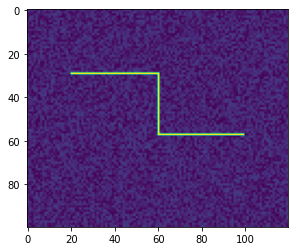

In [6]:
plt.imshow(R1)
plt.show()

plt.imshow(R2)
plt.show()

In [9]:
SW=np.ones([nz,ntr])*1/c

In [10]:
#path = "Data/time_table_120x100.npy"
#TT = MigPreFuncoes.raymodel3(SW,dx,ntr,path)

with open('Data/time_table_120x100.npy', 'rb') as f:
    TTh = np.load(f)

dt=0.004

timer=np.round(TTh/dt)+1

In [12]:
#Wavelet

fr=40 #Hz
nps=200 
dt=.004 #s
rick=df.ricker(nps,fr,dt)

#sx=10  #index position
#sz=0  #index position

# Tempo de ida e volta até o fundo do modelo
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
#nd2=nt+1; 

W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1]

In [14]:
#Creating the synthetic csg

dsx = 5
nsx = nx
ngx = nx
path1 = "Data/CSG_diffbar/semi_fault_denoise"
path2 = "Data/CSG_diffbar/fault_denoise"

#files1 = df.kirchhoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R1,W,path1)
#files2 = df.kirchhoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R2,W,path2)

In [15]:
files_1 = []
files_2 = []
dsx=10 #teste

for i in range(0,nsx,dsx):
    filename1 = 'Data/CSG_diffbar/semi_fault_denoise_{}'.format(i)
    filename2 = 'Data/CSG_diffbar/fault_denoise_{}'.format(i)
    with open(filename1, 'rb') as file:
        (gather1) = np.load(file)
        files_1.append(gather1)
    with open(filename2, 'rb') as file:
        (gather2) = np.load(file)
        files_2.append(gather2)

In [16]:
central_shot = int(len(files_1)/2-1)

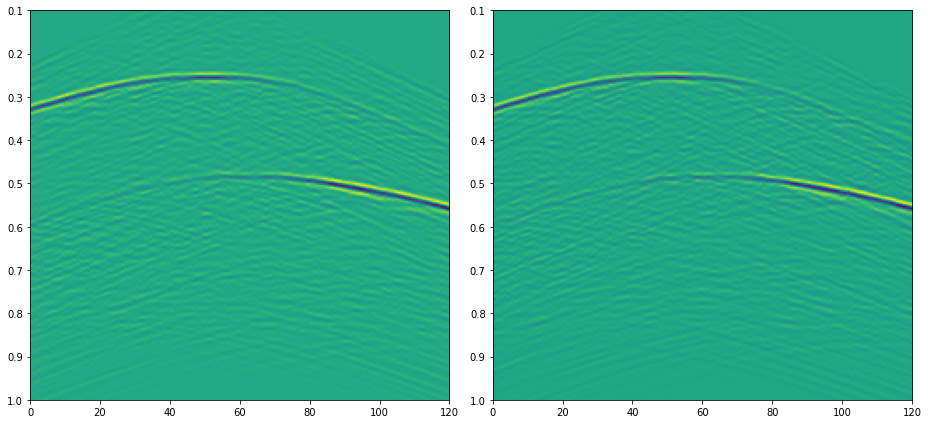

In [17]:
fig = plt.figure(figsize=(13,6))

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(files_1[central_shot],aspect='auto',extent=[0, nx*dx, nt*dt, 0])
ax1.set_ylim([1,0.1])

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(files_2[central_shot],aspect='auto',extent=[0, nx*dx, nt*dt, 0])
ax2.set_ylim([1,0.1])

plt.tight_layout()
plt.show()

(120, 100, 120)


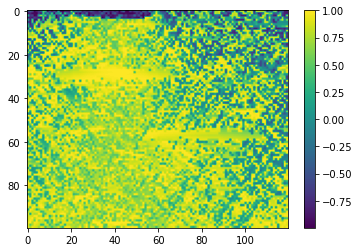

In [22]:
#Assim, o ponto imagem estará no meio da barra x=80 z=34
isx = x_ini_1 #começo da primeira barra #40
igx = x_fim_1 #fim da primeira barra #120

gH = np.gradient(TTh, axis=2) #gradiente horizontal  #diferença entre colunas (do modelo de velocidade)
gV = np.gradient(TTh, axis=1) #gradiente vertical    #diferença entre linhas

print(np.shape(gH))

prV = gV[igx,:,:] 
prH = gH[igx,:,:] 

psV = gV[isx,:,:] 
psH = gH[isx,:,:]

pH = psH + prH
pV = psV + prV

norma = np.sqrt(pH**2 + pV**2)

for idx, x in np.ndenumerate(norma): 
    if x==0:
        norma[idx]=1e-16 #avoid nan's

w = (pH/norma * X1) + (pV/norma * Y1) 

#plt.imshow(pH/norma*X1)
#plt.colorbar()
#plt.show()
#
#plt.imshow(pV/norma*Y1)
#plt.colorbar()
#plt.show()

plt.imshow(w)
plt.colorbar()
plt.show()

In [96]:
z_ini_1

29

In [21]:
print(prV[40,29])
print(psV[40,29])
print(pV[40,29])

0.0031416767225551506
0.0039036555519005034
0.007045332274455654


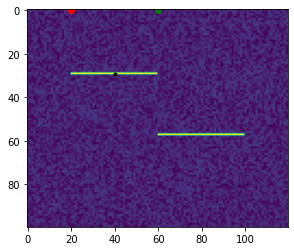

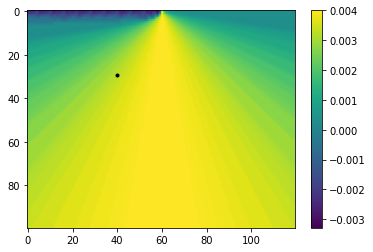

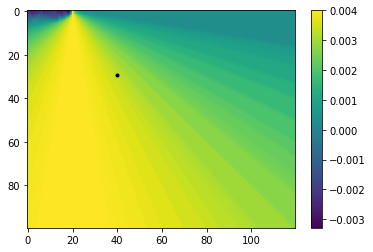

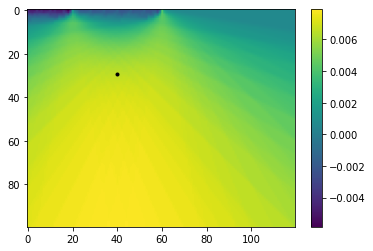

In [22]:
plt.imshow(R1)
plt.plot(x_ini_1,0,"ro")
plt.plot(x_fim_1,0,"go")
plt.plot(40,29,"k.")
plt.show()

plt.imshow(prV,aspect="auto")
plt.plot(40,29,"k.")
plt.colorbar()
plt.show()

plt.imshow(psV,aspect="auto")
plt.plot(40,29,"k.")
plt.colorbar()
plt.show()

plt.imshow(pV,aspect="auto")
plt.plot(40,29,"k.")
plt.colorbar()
plt.show()

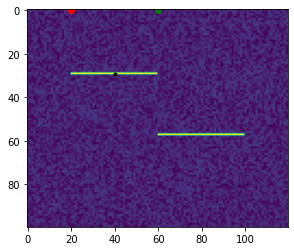

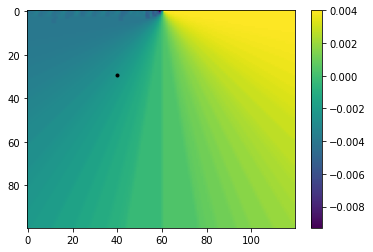

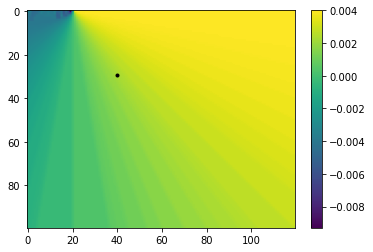

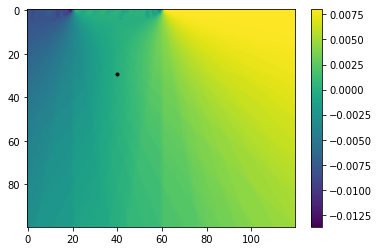

In [23]:
plt.imshow(R1)
plt.plot(x_ini_1,0,"ro")
plt.plot(x_fim_1,0,"go")
plt.plot(40,29,"k.")
plt.show()

plt.imshow(prH,aspect="auto")
plt.plot(40,29,"k.")
plt.colorbar()
plt.show()

plt.imshow(psH,aspect="auto")
plt.plot(40,29,"k.")
plt.colorbar()
plt.show()

plt.imshow(pH,aspect="auto")
plt.plot(40,29,"k.")
plt.colorbar()
plt.show()

-0.004376986621908011 0.9999904209481767
1.0


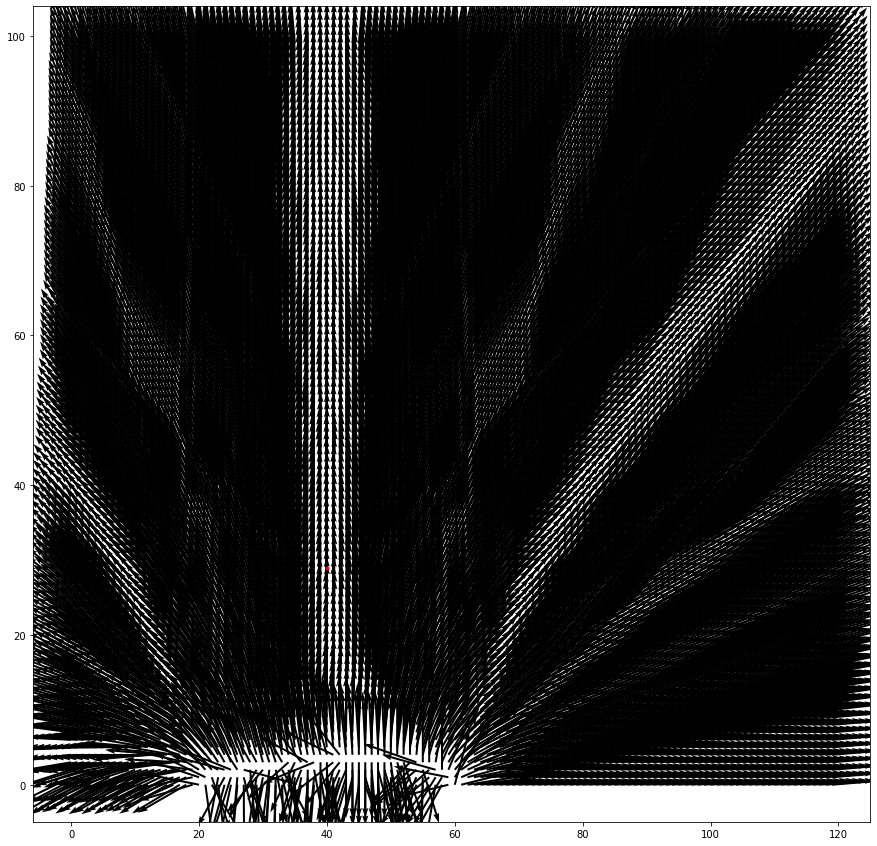

In [46]:
[X,Y]=np.meshgrid(np.arange(0,nx),np.arange(0,nz))

norm=np.sqrt(pH**2+pV**2)

fig, ax = plt.subplots(figsize=[15,15])

q=ax.quiver(X, Y, pH/norm, pV/norm,scale=15.0)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
ax.plot(40,29,"r.")

print(pH[29,40]/norm[29,40],pV[29,40]/norm[29,40])
print(np.max(np.max((pV/norm))))

In [20]:
#Slant Stack

pmin = -2
pmax = 2
dp = 0.1
xwin=zwin = 25
x_ini=z_ini = 0

pm1,sm1 = df.local_window(R1,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp) 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:53<00:00,  1.13s/it]


In [ ]:
pm2,sm2 = SlantStack.local_window(R2,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp) 

In [21]:
m_theta1 = np.arctan(pm1)
#m_theta2 = np.arctan(pm2)

X1 = np.sin(m_theta1)
Y1 = np.cos(m_theta1)
#X2 = np.sin(m_theta2)
#Y2 = np.cos(m_theta2)

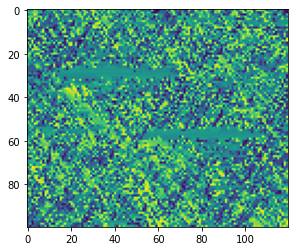

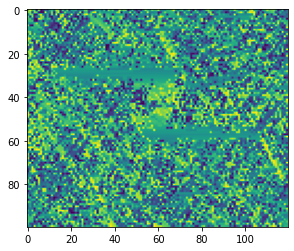

In [22]:
plt.imshow(pm1)
plt.show()

plt.imshow(pm2)
plt.show()

In [15]:
dwin=dt
win=10*dt #(metade) janela em tempo em cada etapa
app_ref=10 # abertura reflexões
app_dif=80 # abertura difrações
isx=60

#gather1 = files_1[central_shot]
#gather2 = files_2[central_shot]

file_center1 = 'Data/CSG_diffbar/semi_fault_denoise_{}'.format(isx)
file_center2 = 'Data/CSG_diffbar/fault_denoise_{}'.format(isx)

with open(file_center1, 'rb') as file:
    gather1 = np.load(file)

with open(file_center2, 'rb') as file:
    gather2 = np.load(file)

In [16]:
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

<module 'SlantStack' from 'C:\\Users\\guilh\\Desktop\\Code\\SeismicDiffractions\\SlantStack.py'>

In [17]:
refl1,diff1 = MigPreFuncoes.migration_teste(gather1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X1,Y1,sm1)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:10<00:00, 11.24it/s]


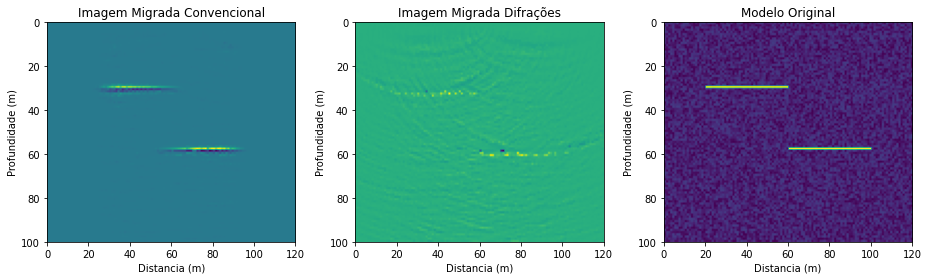

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:10<00:00, 11.87it/s]


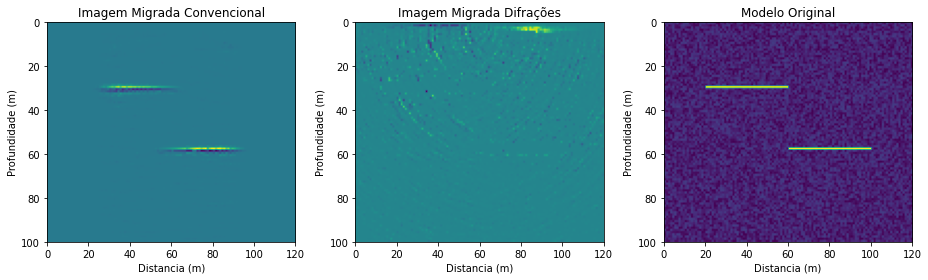

In [19]:
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

refl1,diff1 = MigPreFuncoes.migration_teste(gather1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X1,Y1,sm1)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
###############################################

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:09<00:00, 12.28it/s]


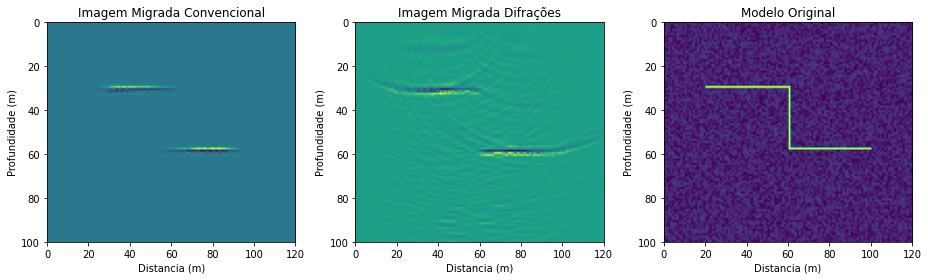

In [29]:
refl2,diff2 = MigPreFuncoes.migration_teste(gather2,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X2,Y2,sm2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl2, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff2, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R2, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

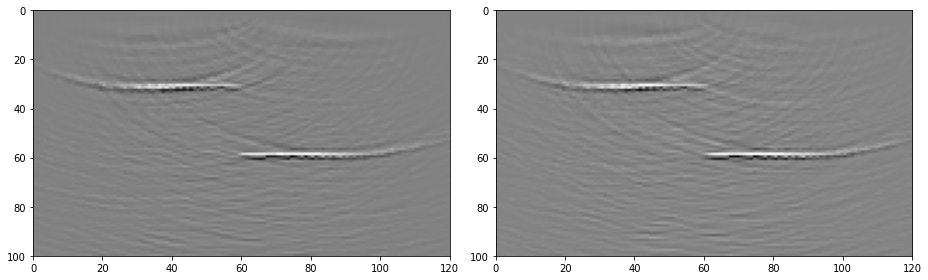

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,4))

ax1.imshow(diff1, aspect="auto",extent=[0,dx*nx,dz*nz,0], cmap="Greys")
ax2.imshow(diff2, aspect="auto",extent=[0,dx*nx,dz*nz,0], cmap="Greys")
plt.tight_layout()
plt.show()

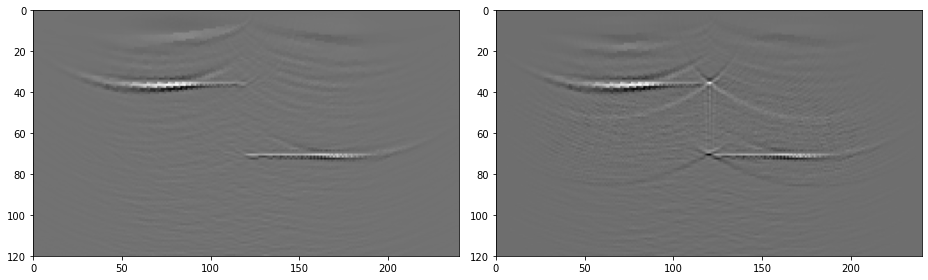

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,4))

ax1.imshow(diff1, aspect="auto",extent=[0,dx*nx,dz*nz,0], cmap="Greys")
ax2.imshow(diff2, aspect="auto",extent=[0,dx*nx,dz*nz,0], cmap="Greys")
plt.tight_layout()
plt.show()

12it [01:20,  6.70s/it]


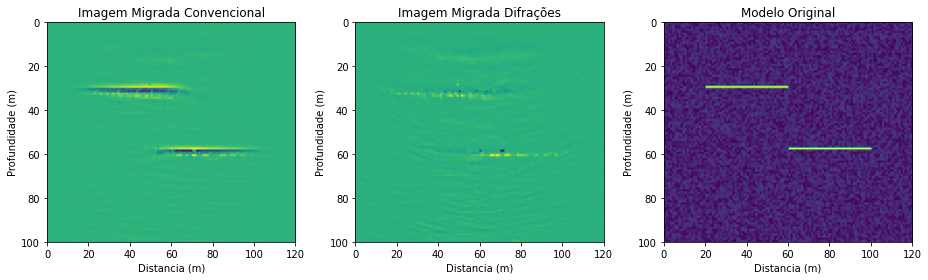

In [87]:
reflstck1,diffstck1 = MigPreFuncoes.migration_teste(files_1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X1,Y1,sm1)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(reflstck1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diffstck1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R1, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

12it [01:15,  6.30s/it]


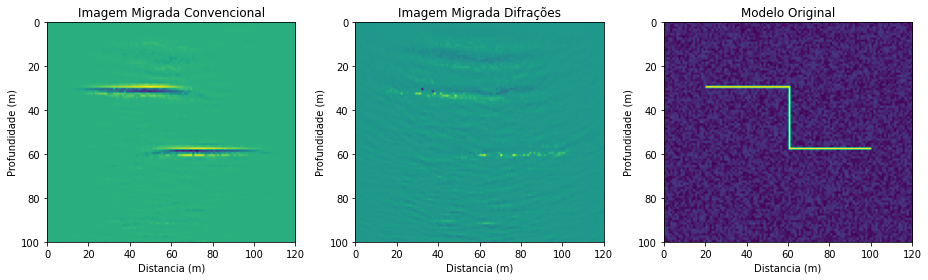

In [35]:
reflstck2,diffstck2 = MigPreFuncoes.migration_teste(files_2,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X2,Y2,sm2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(reflstck2, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diffstck2, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R2, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

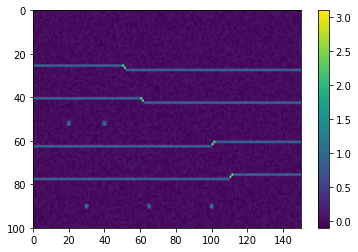

In [2]:
#Tentando gerar um  novo modelo 

nx=ntr=150
nz=100
dx=1.0
dz=1.0 
c=250

MOD = np.zeros([ntr,nz])

#####################################
for i in range(0,int(np.round(nx/3))):
    z1 = int(np.round(nz/4))
    MOD[i,z1]=1
    
for i in range(int(np.round((2+nx/3))),nx):
    z2 = int(np.round(nz/4 + 2))
    MOD[i,z2]=1

x1 = np.arange(np.round(nx/3),np.round(nx/3+2))
z1 = np.arange(np.round(nz/4),np.round(nz/4+2))

for i in range(len(x1)):
    for j in range(len(z1)):
        x=int(x1[i])
        z=int(z1[i])
        MOD[x,z]=3

#####################################
for i in range(0,int(np.round(10 + nx/3))):
    z1 = int(np.round(nz/4 + 15))
    MOD[i,z1]=1    

for i in range(int(np.round((12 + nx/3))),nx):
    z2 = int(np.round(nz/4 + 17))
    MOD[i,z2]=1
    
x2 = np.arange(np.round(10 + nx/3),np.round(12 + nx/3))
z2 = np.arange(np.round(nz/4 + 15),np.round(nz/4 + 17))

for i in range(len(x2)):
    for j in range(len(z2)):
        x=int(x2[i])
        z=int(z2[i])
        MOD[x,z]=3

#####################################
for i in range(int(np.round((2+2*nx/3))),nx):
    z1 = int(np.round(3*nz/5))
    MOD[i,z1]=1
    
for i in range(0,int(np.round(2*nx/3))):
    z2 = int(np.round(3*nz/5 + 2))
    MOD[i,z2]=1

x3 = np.arange(np.round(2*nx/3),np.round(2+2*nx/3))
z3 = np.arange(np.round(3*nz/5),np.round(3*nz/5 + 2))

for i in range(len(x3)):
    for j in range(len(z3)):
        x=int(x3[1-i])
        z=int(z3[i])
        MOD[x,z]=3
    
#####################################
for i in range(int(np.round((10+2+2*nx/3))),nx):
    z1 = int(np.round(15+3*nz/5))
    MOD[i,z1]=1
    
for i in range(0,int(np.round(10+2*nx/3))):
    z2 = int(np.round(3*nz/5 + 2 +15))
    MOD[i,z2]=1

x4 = np.arange(np.round(10+2*nx/3),np.round(10+2+2*nx/3))
z4 = np.arange(np.round(3*nz/5+15),np.round(3*nz/5 + 2 + 15))

for i in range(len(x4)):
    for j in range(len(z4)):
        x=int(x4[1-i])
        z=int(z4[i])
        MOD[x,z]=3
    
#####################################    
    
MOD[20-1:20+1,52-1:52+1]=1
MOD[40-1:40+1,52-1:52+1]=1

MOD[30-1:30+1,90-1:90+1]=1
MOD[65-1:65+1,90-1:90+1]=1
MOD[100-1:100+1,90-1:90+1]=1
    
#Adicionando ruído no modelo
nn = np.random.rand(nx,nz)
MOD = MOD+(nn-0.5)*0.2

R = MOD.T

plt.imshow(MOD.T, aspect="auto", extent=[0,dx*nx,nz*dz,0])
plt.colorbar()
plt.show()

In [3]:
SW=np.ones([nz,ntr])*1/c
#Tabela de tempo de trânsito do modelo de vagarosidade SW
#TT=MigPreFuncoes.raymodel3(SW,dx,ntr,"Data/TTh_100x150_250mps.npy")

In [4]:
with open('Data/TTh_100x150_250mps.npy', 'rb') as f:
    TTh = np.load(f)

dt=0.004
timer=np.round(TTh/dt)+1

In [5]:
#Wavelet

fr=40 #Hz
nps=200
dt=.004 #s
rick=MigPreFuncoes.ricker(nps,fr,dt)
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1]

In [6]:
#Creating the synthetic csg

dsx = 15
nsx = nx
ngx = nx
path = "Data/CSG_diffbar/dummy_teste"

#files = MigPreFuncoes.kirchhoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R,W,path)

In [7]:
files = []

for i in range(0,nsx,dsx):
    filename = 'Data/CSG_diffbar/dummy_teste_{}'.format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)
        
len(files)

10

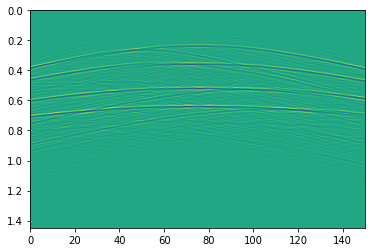

In [8]:
plt.imshow(files[5],aspect="auto",extent=[0, nx*dx, nt*dt, 0])
plt.show()

In [9]:
pmin = -1
pmax = 1
dp = 0.1
xwin=zwin=30
dx=dz=1
x_ini=z_ini=0

#pm,sm = SlantStack.local_window(R,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.15it/s]


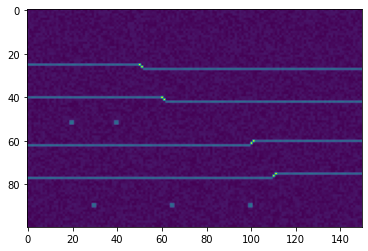

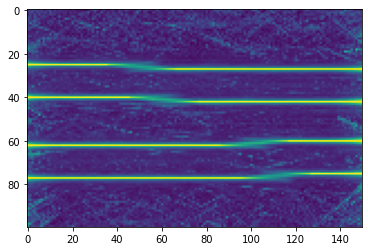

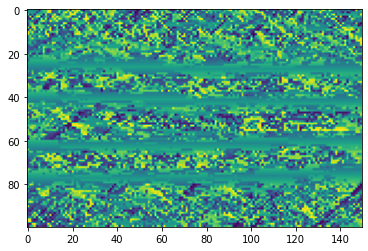

In [10]:
plt.imshow(R,aspect="auto")
plt.show()

plt.imshow(sm,aspect="auto")
plt.show()

plt.imshow(pm,aspect="auto")
plt.show()

In [11]:
m_theta = np.arctan(pm)
X = np.sin(m_theta)
Y = np.cos(m_theta)

In [12]:
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

<module 'SlantStack' from 'C:\\Users\\guilh\\Desktop\\Code\\SeismicDiffractions\\SlantStack.py'>

In [13]:
dwin=dt
win=5*dt
app_ref=20
app_dif=80 

gather1 = files[5]
isx = 75

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:16<00:00,  8.87it/s]


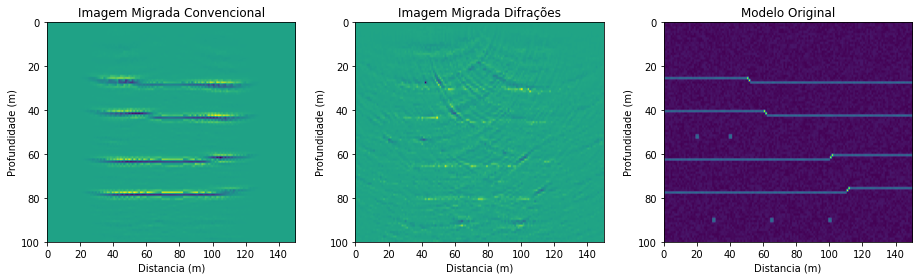

In [14]:
dwin=dt
win=5*dt
app_ref=20
app_dif=80 

gather1 = files[5]
isx = 75

refl,diff = MigPreFuncoes.migration_teste(gather1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

10it [01:33,  9.35s/it]


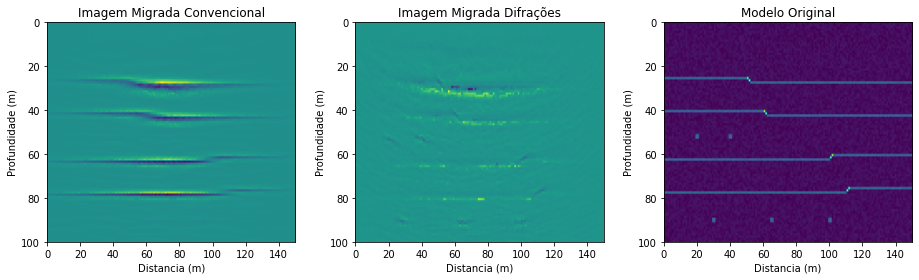

In [14]:
refls,diffs = MigPreFuncoes.migration_teste(files,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refls, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diffs, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

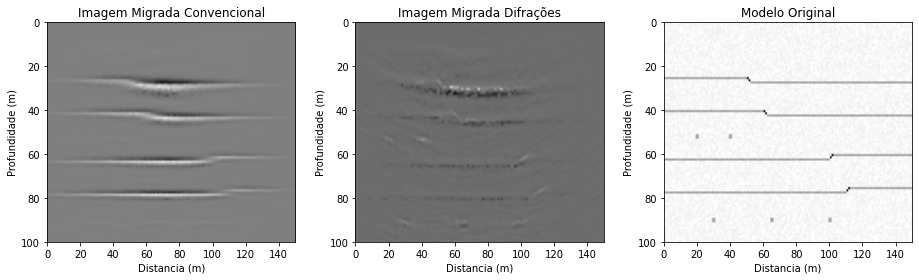

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

cm="binary"
it="gaussian"

ax1.imshow(refls, aspect="auto",extent=[0,dx*nx,dz*nz,0],cmap=cm,interpolation=it)
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diffs, aspect="auto",extent=[0,dx*nx,dz*nz,0],cmap=cm,interpolation=it)
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0],cmap=cm)
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

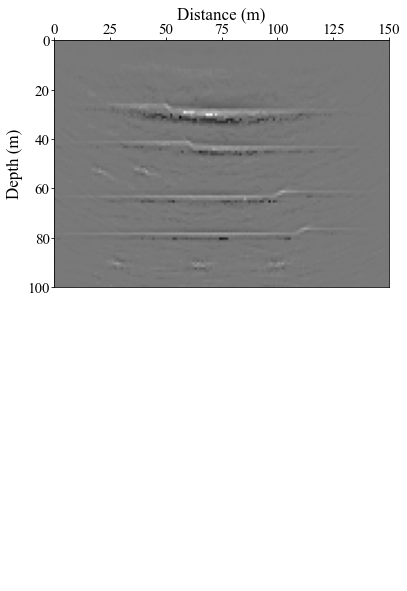

In [16]:
tm_summ = 4*diffs+refls

csfont = {'fontname':'Times New Roman'}


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

im1 = ax1.imshow(tm_summ, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
ax2.set_axis_off()

plt.savefig("Data/tm_summ.png",dpi=300)
plt.show()

In [2]:
## Lab Figuras Velvector2

In [3]:
velvector1 = np.loadtxt("Data/velvector") # Modelo de velocidade - 1 coluna em ASCII
vel = np.reshape(velvector1,[201,501]) # Coloca na dimensão correta
vel1 = vel[40:140,240:360] # Recorta um pequeno pedaço do modelovel[40:140,250:360]

In [4]:
with open("Data/CSG/velvector2_model", "rb") as f:
    R = np.load(f)

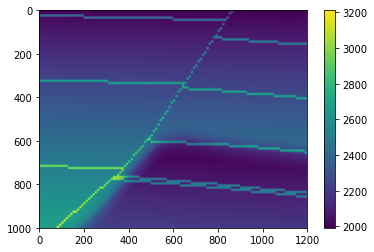

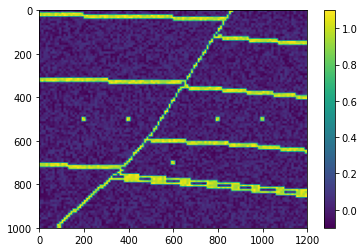

In [5]:
nx=120
nz=100
dx=dz=10
dt=.005
nt=315

plt.imshow(vel1,extent=[0, nx*dx, nz*dz, 0],aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(R,extent=[0, nx*dx, nz*dz, 0],aspect="auto")
plt.colorbar()
plt.show()

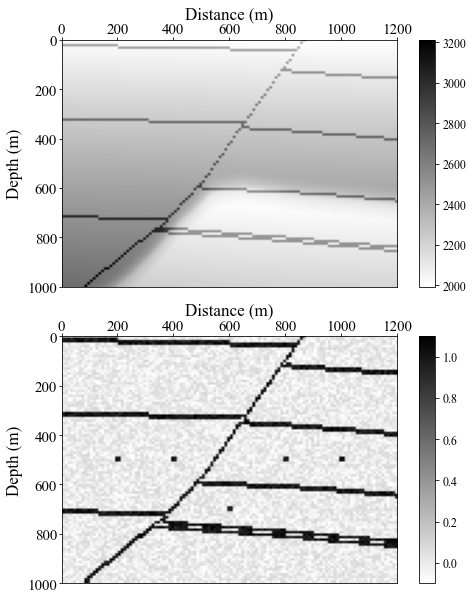

In [7]:
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6.7,10))

im1 = ax1.imshow(vel1, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
divider1 = make_axes_locatable(ax1)

cax1 = divider1.append_axes("right", size="5%", pad=0.3)
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=12)
for l in cbar1.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
    
##########

im2 = ax2.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
divider2 = make_axes_locatable(ax2)

cax2 = divider2.append_axes("right", size="5%", pad=0.3)
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.ax.tick_params(labelsize=12)
for l in cbar2.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

plt.savefig("Data/vv_vel_model.png",dpi=300)
plt.show()

In [9]:
shot = 60
filename = 'Data/CSG/Diff_velvector2_{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather = np.load(file)

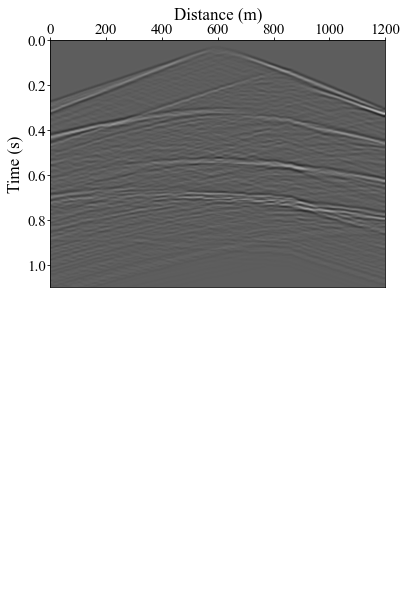

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

im1 = ax1.imshow(gather, extent=[0, nx*dx, nt*dt, 0], aspect='auto', cmap="binary", interpolation="bicubic") #, extent=[0, nx*dx, nz*dz, 0]
ax1.set_ylabel("Time (s)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)
ax1.set_ylim([1.1,0])

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
ax2.set_axis_off()

plt.savefig("Data/vv_cgs.png",dpi=300)
plt.show()

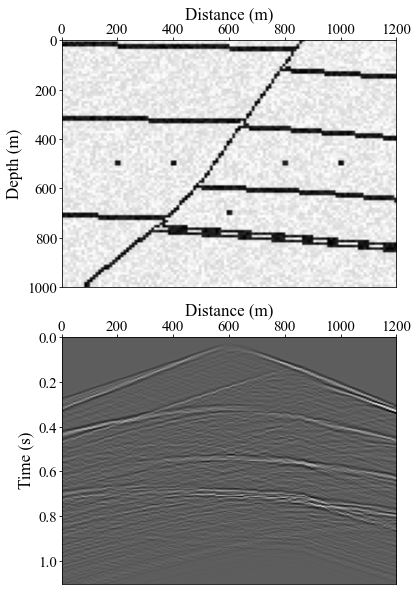

In [8]:
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

im1 = ax1.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
##########

im2 = ax2.imshow(gather, extent=[0, nx*dx, nt*dt, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Time (s)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)
ax2.set_ylim([1.1,0])

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)


for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.savefig("Data/teste1.png",dpi=300)
plt.show()

In [6]:
with open("Data/CSG/Diff_velvector2_dipfield", "rb") as f:
    pm = np.load(f)

with open("Data/CSG/Diff_velvector2_semblance", "rb") as f:
    sm = np.load(f)
    
m_theta = np.arctan(pm)

X = np.sin(m_theta)
Y = np.cos(m_theta)

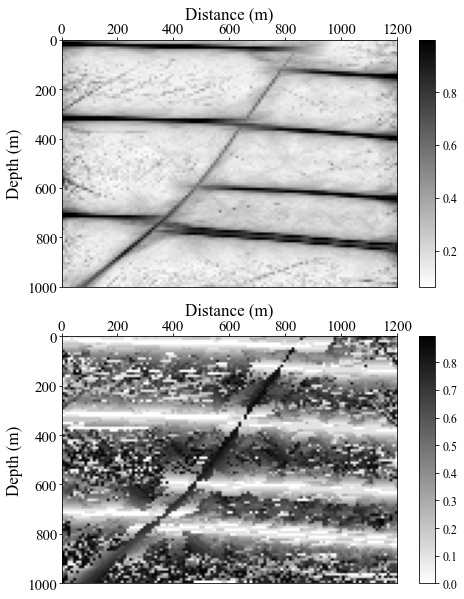

In [9]:
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6.7,10))

im1 = ax1.imshow(sm, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
divider1 = make_axes_locatable(ax1)

cax1 = divider1.append_axes("right", size="5%", pad=0.3)
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=12)
for l in cbar1.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
    
##########

im2 = ax2.imshow(np.abs(X), extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)


for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
divider2 = make_axes_locatable(ax2)

cax2 = divider2.append_axes("right", size="5%", pad=0.3)
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.ax.tick_params(labelsize=12)
for l in cbar2.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

plt.savefig("Data/teste2.png",dpi=300)
plt.show()

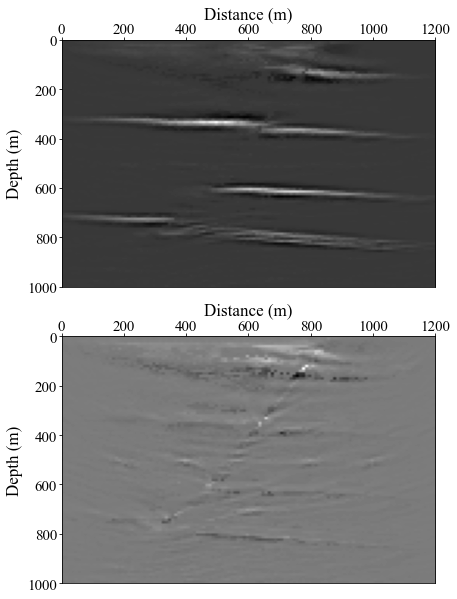

In [40]:
with open("Data/vv_mig_refl", "rb") as f:
    vv_refl = np.load(f)

with open("Data/vv_mig_diff", "rb") as f:
    vv_diff = np.load(f)
    
sx=10  #index position
sz=0  #index position
nx=120
ntr=120
nz=100
dt=.005
dx=10  #meters
dz=10  #meters
    
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6.7,10))

im1 = ax1.imshow(vv_refl, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

#x_ticks = [0,50,100,150,200,240]
#ax1.set_xticks(x_ticks,labels=x_ticks)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
#divider1 = make_axes_locatable(ax1)
#
#cax1 = divider1.append_axes("right", size="5%", pad=0.3)
#cbar1 = plt.colorbar(im1, cax=cax1)
#cbar1.ax.tick_params(labelsize=12)
#for l in cbar1.ax.yaxis.get_ticklabels():
#    l.set_family("Times New Roman")
    
##########

im2 = ax2.imshow(vv_diff, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)

#ax2.set_xticks(x_ticks,labels=x_ticks)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
#divider2 = make_axes_locatable(ax2)
#
#cax2 = divider2.append_axes("right", size="5%", pad=0.3)
#cbar2 = plt.colorbar(im2, cax=cax2)
#cbar2.ax.tick_params(labelsize=12)
#for l in cbar2.ax.yaxis.get_ticklabels():
#    l.set_family("Times New Roman")

#plt.savefig("Data/br_sm_Y.png",dpi=300)
plt.savefig("Data/migs2_vv.png",dpi=300)
plt.show()

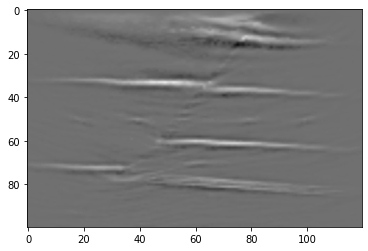

In [20]:
with open("Data/vv_mig_refl", "rb") as f:
    vv_refl = np.load(f)

with open("Data/vv_mig_diff", "rb") as f:
    vv_diff = np.load(f)
    
vv_refldiff = vv_diff+vv_refl

plt.imshow(vv_refldiff,aspect="auto",interpolation="gaussian",cmap="binary")
plt.show()

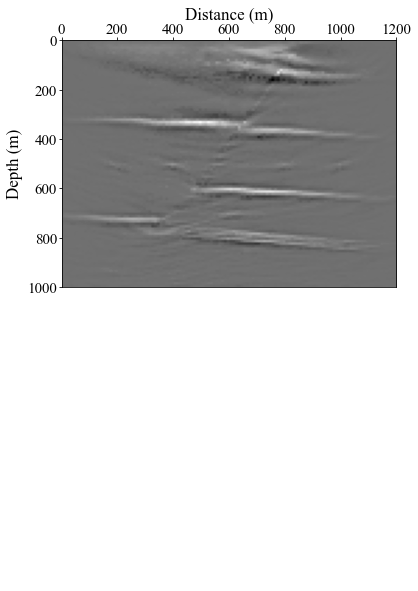

In [24]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

sx=10  #index position
sz=0  #index position
nx=120
ntr=120
nz=100
dt=.005
dx=10  #meters
dz=10  #meters

im1 = ax1.imshow(vv_refldiff, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
ax2.set_axis_off()

plt.savefig("Data/vv_summ.png",dpi=300)
plt.show()

In [13]:
## Lab Figuras Barra 3diff

In [14]:
dx=1.0 #(m) Discretização em X
dz=1.0 #(m) Discretização em Y
nz=120 #Tamanho do Grid em Z
ntr=nx=240 #Tamanho do Grid em X
c=250 #m/s

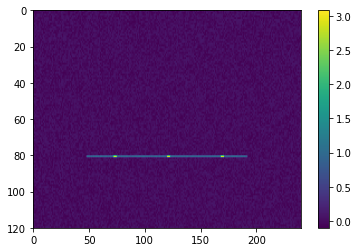

In [15]:
MOD = np.zeros([ntr,nz])

#Barra
x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))

#Pontos Difratores
for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nz*2/3))
    MOD[i,z]=1
MOD[int(np.round(1.5*nx/5)):int(np.round(1.5*nx/5+3)),z]=3 #10
MOD[int(np.round(2.5*nx/5)):int(np.round(2.5*nx/5+3)),z]=3 #10
MOD[int(np.round(3.5*nx/5)):int(np.round(3.5*nx/5+3)),z]=3 #10

#Adicionando ruído no modelo
nn = np.random.rand(ntr,nz)
MOD = MOD+(nn-0.5)*0.2

R_barra = MOD.T

plt.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nz*dz,0])
plt.colorbar()
plt.show()

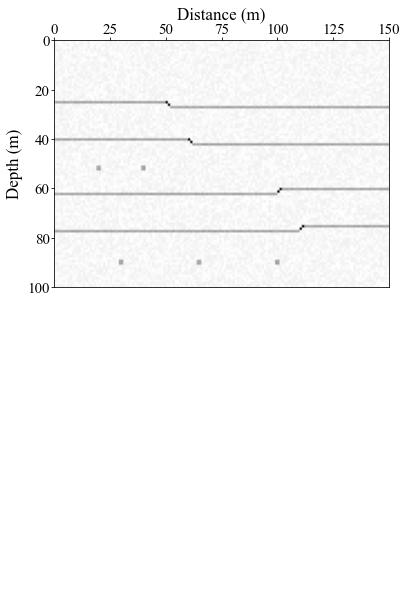

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

csfont = {'fontname':'Times New Roman'}

im1 = ax1.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
#x_ticks = [0,50,100,150,200,240]
#ax1.set_xticks(x_ticks,labels=x_ticks)

ax2.set_axis_off()

plt.savefig("Data/Model_Toy.png",dpi=300)
plt.show()

In [16]:
filename = 'Data/CSG_diffbar/barra_gather_shot_120'
with open(filename, 'rb') as file:
    (gather_barra) = np.load(file)

In [19]:
filename = np.array(files[5])

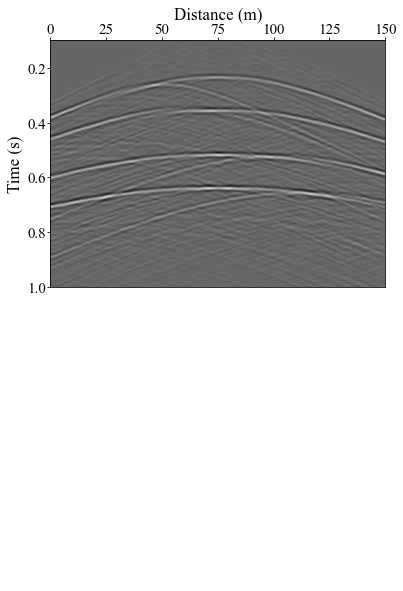

In [22]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

im1 = ax1.imshow(filename, extent=[0, nx*dx, nt*dt, 0], aspect='auto', cmap="binary", interpolation="bicubic") 
ax1.set_ylabel("Time (s)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)
#ax1.set_ylim([1,0.1])
ax1.set_ylim([1.,0.1])

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
#x_ticks = [0,50,100,150,200,240]
#ax1.set_xticks(x_ticks,labels=x_ticks)

ax2.set_axis_off()

#plt.savefig("Data/br_cgs.png",dpi=300)
plt.savefig("Data/tm_cgs.png",dpi=300)
plt.show()

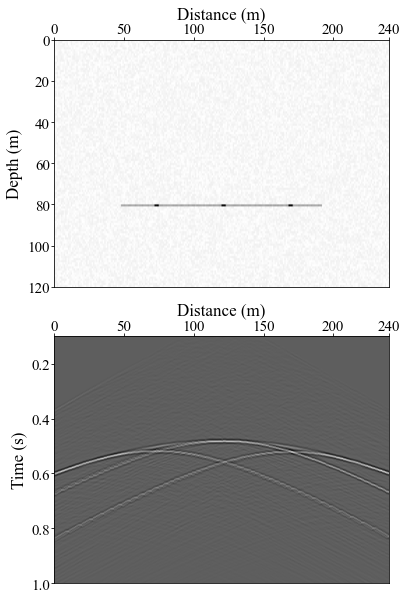

In [39]:
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,10))

im1 = ax1.imshow(R_barra, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

x_ticks = [0,50,100,150,200,240]
ax1.set_xticks(x_ticks,labels=x_ticks)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
##########

im2 = ax2.imshow(gather_barra, extent=[0, nx*dx, nt*dt, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Time (s)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)
ax2.set_ylim([1,0.1])

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)

ax2.set_xticks(x_ticks,labels=x_ticks)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.savefig("Data/br_model_cgs.png",dpi=300)
plt.show()

In [56]:
with open("Data/CSG_diffbar/barra_dipfield", "rb") as f:
    pm = np.load(f)
    
with open("Data/CSG_diffbar/barra_semblance", "rb") as f: 
    sm = np.load(f)
    
m_theta = np.arctan(pm)
X = np.sin(m_theta)
Y = np.cos(m_theta)

#Para retirar os riscos pretos que tem ao longo da barra no painel de semblance
#for i in range(np.shape(sm)[0]):
#    for j in range(np.shape(sm)[1]):
#        if sm[i,j]>=0.95:
#            sm[i,j] = 0.33

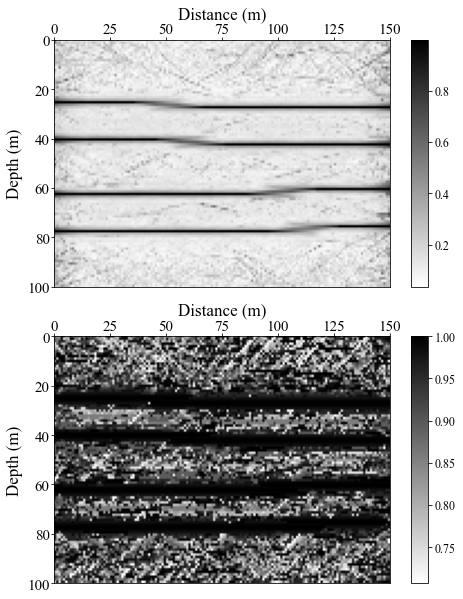

In [26]:
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6.7,10))

im1 = ax1.imshow(sm, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

#x_ticks = [0,50,100,150,200,240]
#ax1.set_xticks(x_ticks,labels=x_ticks)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
divider1 = make_axes_locatable(ax1)

cax1 = divider1.append_axes("right", size="5%", pad=0.3)
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=12)
for l in cbar1.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
    
##########

im2 = ax2.imshow(Y, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)

#ax2.set_xticks(x_ticks,labels=x_ticks)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
divider2 = make_axes_locatable(ax2)

cax2 = divider2.append_axes("right", size="5%", pad=0.3)
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.ax.tick_params(labelsize=12)
for l in cbar2.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

#plt.savefig("Data/br_sm_Y.png",dpi=300)
plt.savefig("Data/tm_sm_Y.png",dpi=300)
plt.show()

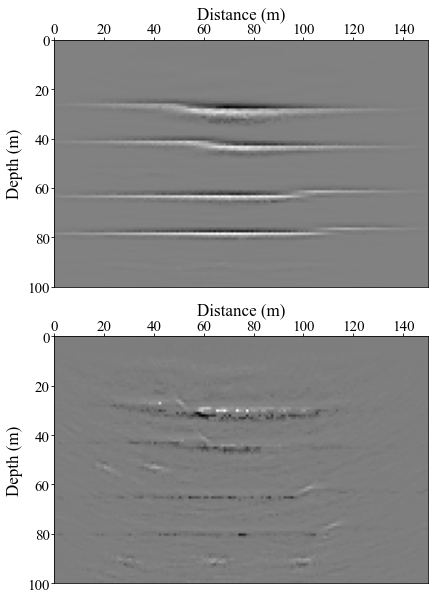

In [37]:
csfont = {'fontname':'Times New Roman'}

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6.7,10))

im1 = ax1.imshow(refls, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None)
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

#ax1.set_ylabel("Profundidade (m)", **csfont, fontsize=17)
#ax1.set_xlabel("Distância (m)", **csfont, fontsize=17)

#x_ticks = [0,50,100,150,200,240]
#ax1.set_xticks(x_ticks,labels=x_ticks)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
#divider1 = make_axes_locatable(ax1)
#
#cax1 = divider1.append_axes("right", size="5%", pad=0.3)
#cbar1 = plt.colorbar(im1, cax=cax1)
#cbar1.ax.tick_params(labelsize=12)
#for l in cbar1.ax.yaxis.get_ticklabels():
#    l.set_family("Times New Roman")
    
##########

im2 = ax2.imshow(diffs, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) #, extent=[0, nx*dx, nz*dz, 0]
ax2.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=15)

#ax2.set_xticks(x_ticks,labels=x_ticks)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
#divider2 = make_axes_locatable(ax2)
#
#cax2 = divider2.append_axes("right", size="5%", pad=0.3)
#cbar2 = plt.colorbar(im2, cax=cax2)
#cbar2.ax.tick_params(labelsize=12)
#for l in cbar2.ax.yaxis.get_ticklabels():
#    l.set_family("Times New Roman")

#plt.savefig("Data/br_sm_Y.png",dpi=300)
plt.savefig("Data/migs2_tm.png",dpi=300)
plt.show()

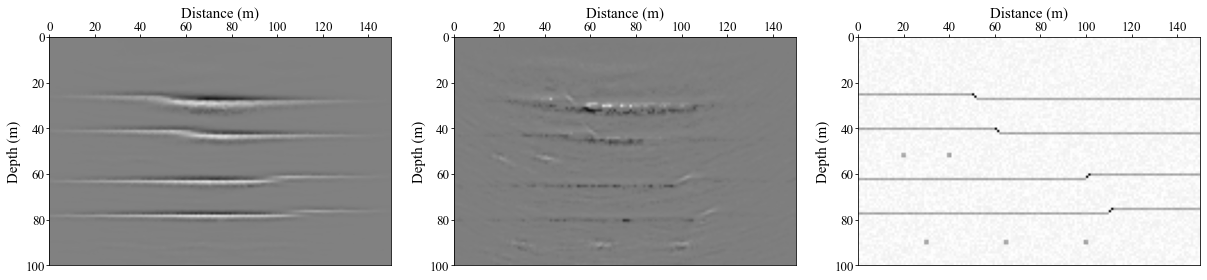

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,4))

cm="binary"
it="gaussian"

label_size=15
tick_size=13

ax1.imshow(refls, aspect="auto",extent=[0,dx*nx,dz*nz,0],cmap=cm,interpolation=it)
#ax1.set_title("Imagem Migrada Convencional")
ax1.set_ylabel("Depth (m)", **csfont, fontsize=label_size)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=label_size)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=tick_size)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=tick_size)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax2.imshow(diffs, aspect="auto",extent=[0,dx*nx,dz*nz,0],cmap=cm,interpolation=it)
#ax2.set_title("Imagem Migrada Difrações")
ax2.set_ylabel("Depth (m)", **csfont, fontsize=label_size)
ax2.set_xlabel("Distance (m)", **csfont, fontsize=label_size)

ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='x', which='major', pad=0, labelsize=tick_size)
ax2.tick_params(axis='y', which='major', pad=1, labelsize=tick_size)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0],cmap=cm)
#ax3.set_title("Modelo Original")
ax3.set_ylabel("Depth (m)", **csfont, fontsize=label_size)
ax3.set_xlabel("Distance (m)", **csfont, fontsize=label_size)

ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', which='major', pad=0, labelsize=tick_size)
ax3.tick_params(axis='y', which='major', pad=1, labelsize=tick_size)

for tick in ax3.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax3.get_yticklabels():
    tick.set_fontname("Times New Roman")

plt.savefig("Data/migs_tm.png",dpi=300)

plt.tight_layout()
plt.show()

In [60]:
with open('Data/time_table_barra.npy', 'rb') as f:
    TTh = np.load(f)

TSX = (TTh[120,:,:])  

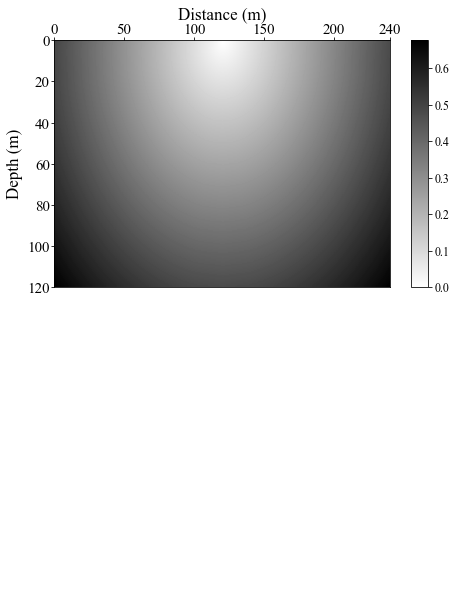

In [61]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6.7,10))

im1 = ax1.imshow(TSX, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap="binary", interpolation=None) 
ax1.set_ylabel("Depth (m)", **csfont, fontsize=17)
ax1.set_xlabel("Distance (m)", **csfont, fontsize=17)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    
x_ticks = [0,50,100,150,200,240]
ax1.set_xticks(x_ticks,labels=x_ticks)

divider1 = make_axes_locatable(ax1)

cax1 = divider1.append_axes("right", size="5%", pad=0.3)
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=12)
for l in cbar1.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

ax2.set_axis_off()

plt.savefig("Data/br_tth.png",dpi=300)
plt.show()

In [77]:
files = []

for i in range(0,240,20):
    filename = 'Data/CSG_diffbar/barra_gather_shot_{}'.format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

In [78]:
import importlib
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

<module 'SlantStack' from 'C:\\Users\\guilh\\Desktop\\Code\\SeismicDiffractions\\SlantStack.py'>

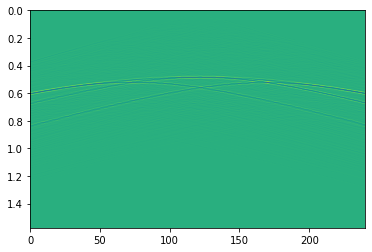

In [89]:
gather1 = files[6]
plt.imshow(gather1,aspect='auto',extent=[0, nx*dx, nt*dt, 0])

In [ ]:
#Generating the model

fr=40
nps=200
dt=.005 
rick=MigPreFuncoes.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position
nx=110
nz=100
dt=.005
dx=10  #meters
dz=10  #meters
c=1992 #velocidade m/s

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))

nd2=nt+1; 
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

velvector1 = np.loadtxt("Data/velvector") 
vel = np.reshape(velvector1,[201,501])

plt.imshow(vel,aspect="auto")
plt.show()

vel1 = vel[65:165,370:480]

c=vel1.min()
tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))

nd2=nt+1; 
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1];
SW = 1./vel1 # Modelo de vagarosidade

plt.imshow(vel1,aspect="auto")#,extent=[0,nx*dx,dz*nz,0])
plt.colorbar()
plt.title("Modelo de Velocidade Heterogêneo")
plt.xlabel("Distancia (m)")
plt.ylabel("Profundidade (m)")
plt.show()


dvel1=(np.abs(np.diff(vel1,axis=0)));
mx=np.max(dvel1.flatten('F'));  # Compute Refl Model for vel1;
dvel1=dvel1/mx;
dvel1=np.round(dvel1);
dvv=dvel1[nz-2,:]
R=np.append(dvel1,dvv[np.newaxis],axis=0);   # We lost a row in R by diff() so we add it back again

#Adding diff points
R[53-1:53+1,15-1:15+1] = 1 
R[54-1:54+1,40-1:40+1] = 1 
R[40-1:40+1,75-1:75+1] = 1 
R[85-1:85+1,20-1:20+1] = 1 
R[85-1:85+1,50-1:50+1] = 1 
R[85-1:85+1,80-1:80+1] = 1 

#Adicionando ruído no modelo
np.random.seed(seed=42)
nn = np.random.rand(nz,nx)
R = R+(nn-0.5)*0.2

plt.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
plt.title("Modelo de Reflectividade")
plt.xlabel("Distancia (m)")
plt.ylabel("Profundidade (m)")
plt.colorbar()
plt.show()

In [ ]:
#Creating the traveltime table

#TT=MigPreFuncoes.raymodel3(SW,dx,nx,'Data/CSG/raiosVelvector2.npy') #Compute traveltime tables TTh(ixsrc,0:nz,0:n)

In [ ]:
#Downloading the preexisting TTh

with open("Data/CSG/raiosVelvector2.npy", 'rb') as f:
    TTh = np.load(f)
    
timer=np.round(TTh/dt)+1

In [ ]:
#Creating the synthetic csg

dsx = 5 
nsx = nx
ngx = nx

#files = MigPreFuncoes.kirchhoffModeling(nsx,ngx,dsx,nx,nt,dt,TTh,R,W,"Data/CSG/velvector2_gather_shot")

In [ ]:
#Downloading the preexisting synthetic csg

files = []

for i in range(0,nsx,dsx):
    filename = "Data/CSG/velvector2_gather_shot_{}".format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

In [ ]:
#Slant Stack

pmin = -2
pmax = 2
dp = 0.1
xwin=zwin=30
x_ini=z_ini=0

#pm,sm = SlantStack.local_window(R,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp) 

with open("Data/CSG/velvector2_dipfield", "wb") as f: 
    np.save(f, pm)
    
with open("Data/CSG/velvector2_semblance", "wb") as f: 
    np.save(f, sm)

In [ ]:
#Downloading the preexisting slant stack

with open("Data/CSG/velvector2_dipfield", "rb") as f:
    pm = np.load(f)

with open("Data/CSG/velvector2_semblance", "rb") as f:
    sm = np.load(f)
    
m_theta = np.arctan(pm)

X = np.sin(m_theta)
Y = np.cos(m_theta)
    
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121)
ax1.set_title("Ângulos pmax (em tangente)")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(pm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Semblance")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(sm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
shot = 60

single_shot = 'Data/CSG/velvector2_gather_shot_{}'.format(int(shot))

with open(single_shot, 'rb') as file:
    gather1t = np.load(file)

gather1=gather1t[0:nt,:]
isx=shot

In [ ]:
#Migration

dwin=dt
win=10*dt #(metade) janela em tempo em cada etapa
app_ref=20 # abertura reflexões
app_dif=50 # abertura difrações

refl,diff = MigPreFuncoes.migration_teste(gather1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(diff[15:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
im2 = ax2.imshow(R[15:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

In [ ]:
refl_stackteste,diff_stackteste = MigPreFuncoes.migration_teste(files,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl_stackteste, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff_stackteste, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

ax3.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Modelo Original")
ax3.set_xlabel("Distancia (m)")
ax3.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(diff_stackteste[20:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])#,interpolation="nearest")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
im2 = ax2.imshow(R[20:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

## Local slant stack - calculando o dip field a partir da imagem migrada

In [ ]:
pmin = -2
pmax = 2
dp = 0.1
xwin=zwin=30
x_ini=z_ini=0

pm,sm = SlantStack.local_window(migrated_image,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121)
ax1.set_title("Ângulos pmax (em tangente)")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(pm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Semblance")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(sm,extent=[0, nx*dx, nz*dz, 0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
m_theta = np.arctan(pm)

X = np.sin(m_theta)
Y = np.cos(m_theta)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121)
ax1.set_title("Componente X")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(X)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Componente Y")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(Y)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
win=20*dt #(metade) janela em tempo em cada etapa
dwin=dt
app=20 # abertura em traços
epsilon=0.1  # frequency dependent

shot = 60
filename = 'Data/CSG/velvector_gather_shot_{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather1t = np.load(file)

print(nt)
gather1=gather1t[0:nt,:]
isx=shot

In [ ]:
mig_winapp = MigPreFuncoes.migvsp_winapp(gather1,isx,dx,dz,dt,
                                         win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_winapp, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
mig_diff = MigPreFuncoes.migvsp_winapp_diff(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_diff[15:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Difração")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R[15:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
mig_stack = MigPreFuncoes.migstack_winapp(files,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_stack, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
mig_stack_diff = MigPreFuncoes.migstack_winapp_diff(files,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_stack_diff[15:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R[15:,:], aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
def migvsp_winapp(gather,isx,dx,dz,dt,win,dwin,app,TTh):
    """
    Calcula a migração para 1 arquivo (1 tiro) com janela (window) e abertura (aperture)
    Considera a função peso w = w(s,r,t)
    
    Entrada:
    gather - dado sísmico (nt,ntr)
    isx - posição do tiro
    dx - discretização no eixo x (m)
    dz - discretização no eixo z (m)
    dt - discretização do tempo (s)
    win - (tamanho da janela)/2
    dwin - passo da janela. Preferencialmente, dwin=dt
    app - tamanho da abertura
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    X - componente X da normal do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y da normal do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    epsilon - entre 0 e 1- relacionado à frequência (zona de Fresnel)
    Saída:
    mig - imagem migrada com janela e abertura. Formato: matriz [nt,ntr]
    """
    gather = MigPreFuncoes.phase_shift(gather)
    
    timer=np.round(TTh/dt)+1
    #timer=TTh
    
    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather e traveltime table tem numero diferente de traços')
        
    mig=np.zeros([nz,nx])
    
    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    # Loop over each trace of the shot gather at src isx
    for igx in tqdm(range(0,ntr)):
        #w = peso(TTh,dt,X,Y,igx,isx)
        w=1
        #mask = w>(1-epsilon)
        trace_win = np.zeros([nz,nx])
        R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
        r_mask = (R==0)
        R[r_mask]= dx/1000 #trocando 0 por algo pequeno
        obli = IIZ/R
        trace_app = MigPreFuncoes.taper(ntr,nz,app,isx,igx) 
        
        for j in range(len(window)): #somar amplitudes da curva de difração com uma janela 
            t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
            twin = t + window[j]
            t2 = (twin<nt)*twin 
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
            trace1 = trace1.reshape([nz,nx])*(w) 
            trace1 = trace1*trace_app
            trace_win = trace_win+trace1
        
        mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace_win*obli
        
    return mig

In [ ]:
# TESTANDO OS PARÂMETROS - ABERTURA E JANELA

#win=25*dt #(metade) janela em tempo em cada etapa
dwin=dt
#app=40 # abertura em traços

shot = 60
filename = 'Data/CSG/velvector_gather_shot_{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather1t = np.load(file)

gather1=gather1t[0:nt,:]
isx=shot

for win in range(10,80,5):
    for app in range(10,80,5):
        migrated_image = MigPreFuncoes.migvsp_dipfield(gather1,isx,dx,dz,dt,win*dt,dwin,app,TTh)
        print(f"App = {app} ; Win = {win}")
        plt.imshow(migrated_image, aspect="auto",extent=[0,dx*nx,dz*nz,0])
        plt.show()

In [ ]:
nx = 40
ny = 60
dummy_matrix = np.ones([ny,nx])

for i in range(dummy_matrix.shape[0]):
    for j in range(dummy_matrix.shape[1]):
        dummy_matrix[i,j] = (i+j)

#Coordenadas de um determinado ponto imagem
x0 = np.round(nx/2)
y0 = np.round(ny/2)

x = np.arange(nx)

#Variando a inclinação da reta
pini = -5
pfim = 5
dp = 0.1
p = np.arange(pini,pfim,dp)

plt.imshow(dummy_matrix,aspect="auto")
plt.plot(x0,y0,"ro")

for i in range(len(p)):
    y = p[i]*(x-x0) + y0
    
    for k in range(nx):
        if (x[k]<nx) and (y[k]>0 and y[k]<ny):
            plt.plot(x[k],y[k],"k.")

    plt.plot(x,y)

plt.xlim(0,nx)
plt.ylim(0,ny)
plt.show()

In [ ]:
files = np.array(files)
files.ndim

gather1 = np.array(gather)
gather1.ndim

In [ ]:
refl,diff = MigPreFuncoes.kirchhoffMigration(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Imagem Migrada Difrações")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [ ]:
def kirchhoffMigration(gather,isx,dx,dz,dt,win,dwin,app,TTh,X,Y):
    """
    Calcula a migração para 1 arquivo (1 tiro) com janela (window) e abertura (aperture)
    Considera a função peso w = w(s,r,t)
    
    Entrada:
    gather - dado sísmico (nt,ntr) ou lista com dados sísmicos (nt,ntr,?)
    isx - posição do tiro
    dx - discretização no eixo x (m)
    dz - discretização no eixo z (m)
    dt - discretização do tempo (s)
    win - (tamanho da janela)/2
    dwin - passo da janela. Preferencialmente, dwin=dt
    app - tamanho da abertura
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    X - componente X da normal do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y da normal do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    epsilon - entre 0 e 1- relacionado à frequência (zona de Fresnel)
    
    Saída:
    mig - imagem migrada com janela e abertura. Formato: matriz [nt,ntr]
    """
    
    gather = np.array(gather)
    
    # single shot 
    if gather.ndim == 2:
    
        gather = phase_shift(gather)
        timer=np.round(TTh/dt)+1

        window = np.arange(-win,win,dwin)
        [nt,ntr]=gather.shape
        [ntr2,nz,nx]=timer.shape
        if ntr!=ntr2:
            print('Gather e traveltime table tem numero diferente de traços')

        refl_migimage=np.zeros([nz,nx])
        diff_migimage=np.zeros([nz,nx])

        IX = np.arange(0,nx*dx,dx)
        IZ = np.arange(0,nz*dz,dz)
        [IIX,IIZ] = np.meshgrid(IX,IZ)

        for igx in tqdm(range(0,ntr)):
            w = peso(TTh,dt,X,Y,igx,isx)
            trace_win = np.zeros([nz,nx])
            R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
            r_mask = (R==0)
            R[r_mask]= dx/1000 
            obli = IIZ/R
            trace_app = taper(ntr,nz,app,isx,igx) 

            for j in range(len(window)):
                t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] 
                twin = t + window[j]
                t2 = (twin<nt)*twin 
                trace1 = gather.T[np.ix_([igx],t2.flatten().astype(np.int32))]
                trace_refl1 = trace1.reshape([nz,nx])*(w)
                trace_diff1 = trace1.reshape([nz,nx])*(1-w)
                trace_refl = trace_refl1*trace_app
                trace_diff = trace_diff1*trace_app
                trace_reflwin = trace_reflwin+trace_refl
                trace_diffwin = trace_diffwin+trace_diff

            refl_migimage[0:nz,0:nx] = refl_migimage[0:nz,0:nx] + trace_reflwin*obli
            diff_migimage[0:nz,0:nx] = refl_migimage[0:nz,0:nx] + trace_diffwin*obli
    
    # multiple shots, stack the migrated images
    elif gather.ndim == 3:
        
        gathers_shifted = []

        for i in gather:
            gather_shifted = phase_shift(i)
            gathers_shifted.append(gather_shifted)

        files = gathers_shifted
        timer=np.round(TTh/dt)+1

        refl_migimages = []
        diff_migimages = []
        
        refl_migimage = np.zeros([nz,nx])
        diff_migimage = np.zeros([nz,nx])
        

        for count,gather in tqdm(enumerate(files)):
            isx = count
            window = np.arange(-win,win,dwin)
            [nt,ntr]=gather.shape
            [ntr2,nz,nx]=timer.shape
            if ntr!=ntr2:
                print('Gather e traveltime table tem numero diferente de traços')

            #mig=np.zeros([nz,nx])
            refl_mig = np.zeros([nz,nx])
            diff_mig = np.zeros([nz,nx])
            
            IX = np.arange(0,nx*dx,dx)
            IZ = np.arange(0,nz*dz,dz)
            [IIX,IIZ] = np.meshgrid(IX,IZ)

            for igx in range(0,ntr):
                w = peso(TTh,dt,X,Y,igx,isx)
                trace_win = np.zeros([nz,nx])
                R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
                r_mask = (R==0)
                R[r_mask]= dx/1000
                obli = IIZ/R
                trace_app = taper(ntr,nz,app,isx,igx) 

                for j in range(len(window)):
                    t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] 
                    twin = t + window[j]
                    t2 = (twin<nt)*twin 
                    trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
                    trace1 = trace1.reshape([nz,nx])*(1-w) 
                    #trace1 = trace1*trace_app
                    #trace_win = trace_win+trace1
                    trace_refl1 = trace1.reshape([nz,nx])*(w)
                    trace_diff1 = trace1.reshape([nz,nx])*(1-w)
                    trace_refl = trace_refl1*trace_app
                    trace_diff = trace_diff1*trace_app
                    trace_reflwin = trace_reflwin+trace_refl
                    trace_diffwin = trace_diffwin+trace_diff

                refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin*obli
                diff_mig[0:nz,0:nx] = diff_mig[0:nz,0:nx] + trace_diffwin*obli

            #migs.append(mig)
            refl_migimages.append(refl_mig)
            diff_migimages.append(diff_mig)

        #mig_final = np.add.reduce(migs)
        refl_migimage = np.add.reduce(refl_migimages)
        diff_migimage = np.add.reduce(diff_migimages)
        
    return refl_migimage, diff_migimage

In [ ]:
def migvsp_double(gather,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon):
    
    gather = np.array(gather)
    
    if gather.ndim == 2:
    
        gather = MigPreFuncoes.phase_shift(gather)

        timer=np.round(TTh/dt)+1
        #timer=TTh

        window = np.arange(-win,win,dwin)
        [nt,ntr]=gather.shape
        [ntr2,nz,nx]=timer.shape
        if ntr!=ntr2:
            print('Gather e traveltime table tem numero diferente de traços')

        #mig=np.zeros([nz,nx])
        refl_mig = np.zeros([nz,nx])
        diff_mig = np.zeros([nz,nx])

        IX = np.arange(0,nx*dx,dx)
        IZ = np.arange(0,nz*dz,dz)
        [IIX,IIZ] = np.meshgrid(IX,IZ)
        # Loop over each trace of the shot gather at src isx
        for igx in tqdm(range(0,ntr)):
            w = MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)
            #trace_win = np.zeros([nz,nx])
            trace_reflwin = np.zeros([nz,nx])
            trace_diffwin = np.zeros([nz,nx])
            R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
            r_mask = (R==0)
            R[r_mask]= dx/1000 #trocando 0 por algo pequeno
            obli = IIZ/R
            trace_app = MigPreFuncoes.taper(ntr,nz,app,isx,igx) 

            for j in range(len(window)): #somar amplitudes da curva de difração com uma janela 
                t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
                twin = t + window[j]
                t2 = (twin<nt)*twin 
                trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
                #trace1 = trace1.reshape([nz,nx])*(w)
                trace_refl1 = trace1.reshape([nz,nx])*(w)
                trace_diff1 = trace1.reshape([nz,nx])*(1-w)
                #trace1 = trace1*trace_app
                trace_refl = trace_refl1*trace_app
                trace_diff = trace_diff1*trace_app
                #trace_win = trace_win+trace1
                trace_reflwin = trace_reflwin + trace_refl
                trace_diffwin = trace_diffwin + trace_diff

            #mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace_reflwin*obli
            refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin*obli
            diff_mig[0:nz,0:nx] = diff_mig[0:nz,0:nx] + trace_diffwin*obli
            
    elif gather.ndim == 3:

        gathers_shifted = []

        for i in gather:
            gather_shifted = MigPreFuncoes.phase_shift(i)
            gathers_shifted.append(gather_shifted)

        files = gathers_shifted
        timer=np.round(TTh/dt)+1
        
        #migs = []
        refl_migs = []
        diff_migs = []

        for count,gather in tqdm(enumerate(files)):
            isx = count
            window = np.arange(-win,win,dwin)
            [nt,ntr] = gather.shape
            [ntr2,nz,nx] = timer.shape
            if ntr!=ntr2:
                print('Gather e traveltime table tem numero diferente de traços')

            #mig=np.zeros([nz,nx])
            #mig_final=np.zeros([nz,nx])
            
            refl_mig_isx = np.zeros([nz,nx])
            diff_mig_isx = np.zeros([nz,nx])

            IX = np.arange(0,nx*dx,dx)
            IZ = np.arange(0,nz*dz,dz)
            [IIX,IIZ] = np.meshgrid(IX,IZ)

            for igx in range(0,ntr):
                w = MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)
                #trace_win = np.zeros([nz,nx])
                trace_reflwin = np.zeros([nz,nx])
                trace_diffwin = np.zeros([nz,nx])
                R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
                r_mask = (R==0)
                R[r_mask]= dx/1000
                obli = IIZ/R
                trace_app = MigPreFuncoes.taper(ntr,nz,app,isx,igx) 

                for j in range(len(window)):
                    t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
                    twin = t + window[j]
                    t2 = (twin<nt)*twin 
                    trace1 = gather.T[np.ix_([igx],t2.flatten().astype(np.int32))]
                    #trace1 = trace1.reshape([nz,nx])*w 
                    trace_refl1 = trace1.reshape([nz,nx])*(w)
                    trace_diff1 = trace1.reshape([nz,nx])*(1-w)
                    #trace1 = trace1*trace_app
                    trace_refl = trace_refl1*trace_app
                    trace_diff = trace_diff1*trace_app
                    #trace_win = trace_win+trace1
                    trace_reflwin = trace_reflwin + trace_refl
                    trace_diffwin = trace_diffwin + trace_diff

                #mig[0:nz,0:nx]=mig[0:nz,0:nx] + trace_win*obli
                refl_mig_isx[0:nz,0:nx] = refl_mig_isx[0:nz,0:nx] + trace_reflwin*obli
                diff_mig_isx[0:nz,0:nx] = diff_mig_isx[0:nz,0:nx] + trace_diffwin*obli

            #migs.append(mig)
            refl_migs.append(refl_mig_isx)
            diff_migs.append(diff_mig_isx)

        #mig_final = np.add.reduce(migs)
        refl_mig = np.add.reduce(refl_migs)
        diff_mig = np.add.reduce(diff_migs)
        
    return refl_mig,diff_mig

In [ ]:
M = MigPreFuncoes.migvsp_winapp(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

plt.imshow(M,aspect="auto")
plt.show()

In [ ]:
D = MigPreFuncoes.migvsp_winapp_diff(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

plt.imshow(D,aspect="auto")
plt.show()

In [ ]:
Refl, Diff = migvsp_double(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

plt.imshow(Refl,aspect="auto")
plt.show()

plt.imshow(Diff,aspect="auto")
plt.show()

In [ ]:
Refl, Diff = migvsp_double(files,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

plt.imshow(Refl,aspect="auto")
plt.show()

plt.imshow(Diff,aspect="auto")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rr(nps, fr, dt):
    npt = nps * dt
    t = np.arange(-npt/2, npt/2, dt)
    rr = (1 - t**2 * fr**2 * np.pi**2) * np.exp(-t**2 * np.pi**2 * fr**2)
    return rr[:nps]

def ricker(nps,fr,dt):
    npt = nps * dt
    t = np.arange(-npt/2,npt/2,dt)
    rick1=(1-t *t * fr**2 *np.pi**2  ) * np.exp(- t**2 * np.pi**2 * fr**2 )
    rick=rick1[int(np.round(nps/2))-(int(np.round(1/fr/dt)))+1:nps]
    l = len(rick)
    if l<nps:
        rick2=np.append(rick,np.zeros([1,nps-1]))
    l=nps
    rick=rick2
    return np.array(rick)

In [ ]:
fr=40 
nps=200 
dt=.004 
dx=dz=1
nx=110
nz=100
c=250

rick1=ricker(nps,fr,dt)

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick1[0:nps-1]


plt.plot(np.arange(-nt*dt,nt*dt,dt),W)
plt.show()

rick2=rr(nps,fr,dt)

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))
W2=np.zeros(2*nt);
W2[nt:nt+nps-1]=rick2[0:nps-1]

plt.plot(np.arange(-nt*dt,nt*dt,dt),W2)
plt.show()

In [ ]:
ricker(51, 25, 0.004)

In [ ]:
def lineseg2(z0,x0,z1,x1):
    z1=z1+1
    x1=x1+1
    dz = (z1-z0)
    dx = (x1-x0)
    sgnz = np.sign(dz)
    sgnx = np.sign(dx)
    pz=[]
    px=[]
    pz.append(z0)
    px.append(x0)
    j = 2
    if sgnz!=0:
        zrange = np.arange(z0+sgnz,z1,sgnz)
        for z in zrange:
            pz.append(z)
            px.append(x0 + (z-z0)*dx/dz)
            j = j+1
    if sgnx!=0:
        xrange = np.arange(x0+sgnx,x1,sgnx)
        for x in xrange:
            px.append(x)
            pz.append(z0+(x-x0)*dz/dx)
            j = j+1
            
            
    pz.append(z1)
    px.append(x1)
    px = np.sort(px)
    pz = np.sort(pz)
    if  sgnx==-sgnz:
        px=np.flip(px)
    return [pz,px,j]

In [ ]:
lineseg2(0, 0, 3, 3)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
dx=1.0 #(m) Discretização em X
dz=1.0 #(m) Discretização em Y
nz=100 #Tamanho do Grid em Z
ntr=nx=120 #Tamanho do Grid em X
c=250 #m/s

In [38]:
MOD1 = np.zeros([ntr,nz])

#Adicionando ruído no modelo
np.random.seed(13)
nn = np.random.rand(ntr,nz)
MOD1 = MOD1+(nn-0.5)*0.2

#Barra
x_ini_1 = int(np.round(1*ntr/6))
x_fim_1 = int(np.round(3*ntr/6))
x_ini_2 = int(np.round(3*ntr/6))
x_fim_2 = int(np.round(5*ntr/6))

for i in range(x_ini_1,x_fim_1):
    z = int(np.round(nz*2/7))
    MOD1[i,z]=1
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(nz*4/7))
    MOD1[i,z]=1

R1 = MOD1.T

In [40]:
def plot(grid,filename,nx,dx,nz,dz,xlabel="",ylabel="",cmp="viridis",it=None):
    """
    
    """
    
    csfont = {'fontname':'Times New Roman'}

    fig, (ax1) = plt.subplots(1,1,figsize=(8,6))

    im1 = ax1.imshow(grid, extent=[0, nx*dx, nz*dz, 0], aspect='auto', cmap=cmp, interpolation=it)

    ax1.set_xlabel(xlabel, **csfont, fontsize=17)
    ax1.set_ylabel(ylabel, **csfont, fontsize=17)
    
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax1.tick_params(axis='x', which='major', pad=0, labelsize=15)
    ax1.tick_params(axis='y', which='major', pad=1, labelsize=15)

    for tick in ax1.get_xticklabels():
        tick.set_fontname("Times New Roman")
    for tick in ax1.get_yticklabels():
        tick.set_fontname("Times New Roman")

    divider1 = make_axes_locatable(ax1)

    cax1 = divider1.append_axes("right", size="5%", pad=0.3)
    cbar1 = plt.colorbar(im1, cax=cax1)
    cbar1.ax.tick_params(labelsize=12)
    for l in cbar1.ax.yaxis.get_ticklabels():
        l.set_family("Times New Roman")

    plt.savefig("Data/{}.png".format(str(filename)),dpi=300)
    plt.show()

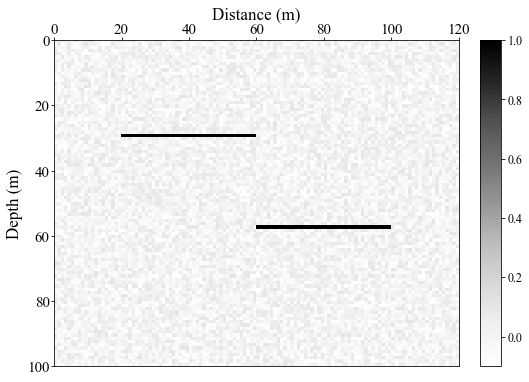

In [43]:
plot(R1,"teste",nx,dx,nz,dz,"Distance (m)","Depth (m)","Greys")